In [35]:
%pip install nibabel matplotlib numpy seaborn

Note: you may need to restart the kernel to use updated packages.


Import the required Libraries - nibabel, numpy, matplotlib

In [36]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Set matplotlib style
plt.style.use('default')
%matplotlib inline

Define Dataset Path and Patient ID

In [ ]:
# Navigate from notebooks/ up to MedBIND3D/, then into BraTS2020_training_data/
base_path = os.path.join('..', 'BraTS2020_training_data', 'MICCAI_BraTS2020_TrainingData')
patient_id = "BraTS20_Training_001"
patient_path = os.path.join(base_path, patient_id)

# Verify paths
print("="*60)
print("PATH VERIFICATION")
print("="*60)
print(f"Current working directory: {os.getcwd()}")
print(f"Absolute data path: {os.path.abspath(patient_path)}")
print(f"Patient directory exists: {os.path.exists(patient_path)}")
print("="*60)

PATH VERIFICATION
Current working directory: c:\Users\arnav\Desktop\MedBIND3D\MedBIND3D\notebooks
Absolute data path: c:\Users\arnav\Desktop\MedBIND3D\MedBIND3D\BraTS2020_training_data\MICCAI_BraTS2020_TrainingData\BraTS20_Training_003
Patient directory exists: True


Define Modality Files

In [38]:
# Define modality file paths
modalities = {
    'flair': os.path.join(patient_path, f"{patient_id}_flair.nii"),
    't1': os.path.join(patient_path, f"{patient_id}_t1.nii"),
    't1ce': os.path.join(patient_path, f"{patient_id}_t1ce.nii"),
    't2': os.path.join(patient_path, f"{patient_id}_t2.nii"),
    'seg': os.path.join(patient_path, f"{patient_id}_seg.nii")
}

print(f"\nPatient: {patient_id}")
print("Checking files...")
for mod, path in modalities.items():
    exists = "✓" if os.path.exists(path) else "✗"
    print(f"{exists} {mod.upper()}: {os.path.basename(path)}")


Patient: BraTS20_Training_003
Checking files...
✓ FLAIR: BraTS20_Training_003_flair.nii
✓ T1: BraTS20_Training_003_t1.nii
✓ T1CE: BraTS20_Training_003_t1ce.nii
✓ T2: BraTS20_Training_003_t2.nii
✓ SEG: BraTS20_Training_003_seg.nii


Load Volumes

In [39]:
# Load NIfTI volumes
nifti_objects = {}
volumes = {}

print("\n" + "="*60)
print("LOADING MRI VOLUMES")
print("="*60)

for modality, file_path in modalities.items():
    if os.path.exists(file_path):
        try:
            # Load NIfTI file
            nifti_objects[modality] = nib.load(file_path)
            
            # Convert to NumPy array
            volumes[modality] = nifti_objects[modality].get_fdata()
            
            print(f"✓ {modality.upper():6s} loaded successfully")
            print(f"  File: {os.path.basename(file_path)}")
            print(f"  Shape: {volumes[modality].shape}")
            print()
        except Exception as e:
            print(f"✗ Error loading {modality.upper()}: {str(e)}\n")
    else:
        print(f"✗ {modality.upper()} file not found")
        print(f"  Looking at: {file_path}\n")

print("="*60)

# Final check
if len(volumes) == 5:
    print("\n🎉 SUCCESS: All 5 modalities loaded!")
    print(f"Total memory: ~{sum(v.nbytes for v in volumes.values()) / 1024**2:.1f} MB")
else:
    print(f"\n⚠️  Only {len(volumes)}/5 modalities loaded")
    missing = set(modalities.keys()) - set(volumes.keys())
    if missing:
        print(f"Missing: {', '.join(missing)}")


LOADING MRI VOLUMES
✓ FLAIR  loaded successfully
  File: BraTS20_Training_003_flair.nii
  Shape: (240, 240, 155)

✓ T1     loaded successfully
  File: BraTS20_Training_003_t1.nii
  Shape: (240, 240, 155)

✓ T1CE   loaded successfully
  File: BraTS20_Training_003_t1ce.nii
  Shape: (240, 240, 155)

✓ T2     loaded successfully
  File: BraTS20_Training_003_t2.nii
  Shape: (240, 240, 155)

✓ SEG    loaded successfully
  File: BraTS20_Training_003_seg.nii
  Shape: (240, 240, 155)


🎉 SUCCESS: All 5 modalities loaded!
Total memory: ~340.6 MB


Verify Dimensions

In [40]:
print("\n" + "="*60)
print("VOLUME DIMENSIONS")
print("="*60)

for modality in ['flair', 't1', 't1ce', 't2', 'seg']:
    if modality in volumes:
        shape = volumes[modality].shape
        print(f"{modality.upper():6s}: {shape} → (Width × Height × Depth)")

print("="*60)


VOLUME DIMENSIONS
FLAIR : (240, 240, 155) → (Width × Height × Depth)
T1    : (240, 240, 155) → (Width × Height × Depth)
T1CE  : (240, 240, 155) → (Width × Height × Depth)
T2    : (240, 240, 155) → (Width × Height × Depth)
SEG   : (240, 240, 155) → (Width × Height × Depth)


Display Statistics

In [41]:
print("\n" + "="*60)
print("VOLUME STATISTICS")
print("="*60)

for modality in ['flair', 't1', 't1ce', 't2', 'seg']:
    if modality in volumes:
        vol = volumes[modality]
        print(f"\n{modality.upper()}:")
        print(f"  Min:  {vol.min():.4f}")
        print(f"  Max:  {vol.max():.4f}")
        print(f"  Mean: {vol.mean():.4f}")
        print(f"  Std:  {vol.std():.4f}")
        print(f"  Non-zero voxels: {np.count_nonzero(vol):,} ({100*np.count_nonzero(vol)/vol.size:.2f}%)")

print("\n" + "="*60)


VOLUME STATISTICS

FLAIR:
  Min:  0.0000
  Max:  773.0000
  Mean: 43.6375
  Std:  111.3757
  Non-zero voxels: 1,261,120 (14.13%)

T1:
  Min:  0.0000
  Max:  709.0000
  Mean: 54.2082
  Std:  138.2049
  Non-zero voxels: 1,261,120 (14.13%)

T1CE:
  Min:  0.0000
  Max:  1898.0000
  Mean: 60.0075
  Std:  154.0919
  Non-zero voxels: 1,261,120 (14.13%)

T2:
  Min:  0.0000
  Max:  385.0000
  Mean: 15.8456
  Std:  42.2233
  Non-zero voxels: 1,261,120 (14.13%)

SEG:
  Min:  0.0000
  Max:  4.0000
  Mean: 0.0073
  Std:  0.1307
  Non-zero voxels: 29,807 (0.33%)



Visualize All Modalities

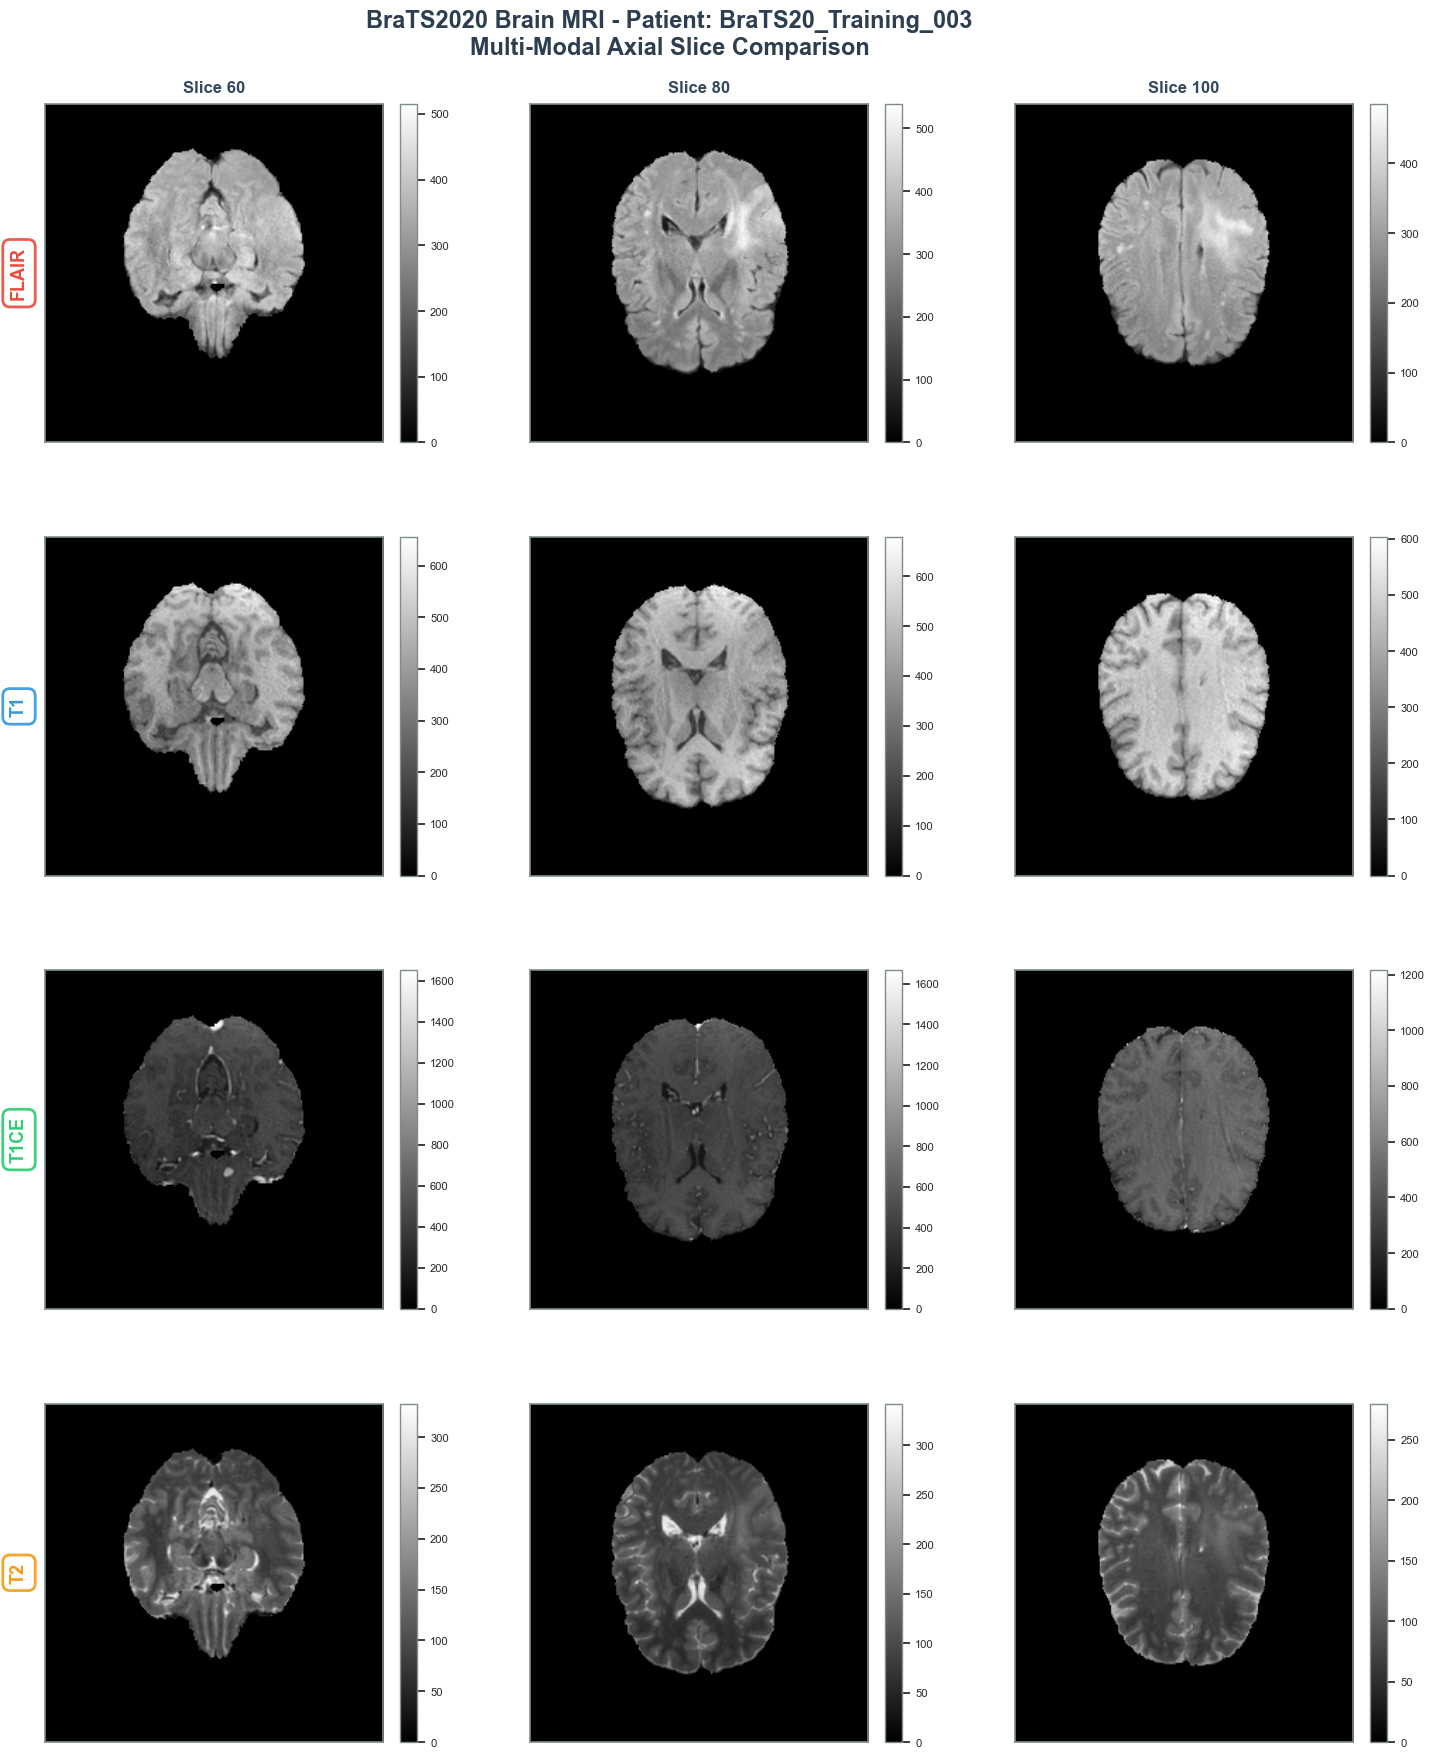


                    📋 MODALITY INFORMATION
Modality     Description                              Slices
----------------------------------------------------------------------
FLAIR        Fluid-Attenuated Inversion Recovery      [60, 80, 100]
T1           T1-weighted (native)                     [60, 80, 100]
T1CE         T1-weighted + Contrast Enhancement       [60, 80, 100]
T2           T2-weighted                              [60, 80, 100]
💡 Tip: Tumors appear hyperintense on FLAIR/T2, hypointense on T1



In [42]:
import seaborn as sns

# Set seaborn style for professional aesthetics
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.0)

# Define slice indices to visualize
slice_indices = [60, 80, 100]

# Create figure with optimized spacing
fig, axes = plt.subplots(4, 3, figsize=(16, 18))

# Enhanced title with FIXED positioning to prevent overlap
fig.suptitle(f'BraTS2020 Brain MRI - Patient: {patient_id}\nMulti-Modal Axial Slice Comparison', 
             fontsize=17, 
             fontweight='bold', 
             y=0.9925,  # Lower y value to move title up
             family='sans-serif',
             color='#2C3E50')

modality_list = ['flair', 't1', 't1ce', 't2']

# Color scheme for modality labels
modality_colors = {
    'flair': '#E74C3C',  # Red
    't1': '#3498DB',     # Blue
    't1ce': '#2ECC71',   # Green
    't2': '#F39C12'      # Orange
}

for row_idx, modality in enumerate(modality_list):
    if modality in volumes:
        for col_idx, slice_idx in enumerate(slice_indices):
            ax = axes[row_idx, col_idx]
            
            # Display axial slice with improved contrast
            slice_data = volumes[modality][:, :, slice_idx]
            im = ax.imshow(slice_data.T, 
                          cmap='gray', 
                          origin='lower',
                          interpolation='bilinear')
            
            # Column titles (only for first row)
            if row_idx == 0:
                ax.set_title(f'Slice {slice_idx}', 
                           fontsize=12, 
                           fontweight='semibold',
                           pad=8,  # Reduced padding
                           family='sans-serif',
                           color='#34495E')
            
            # Row labels (only for first column)
            if col_idx == 0:
                ax.set_ylabel(modality.upper(), 
                            fontsize=13, 
                            fontweight='bold',
                            rotation=90,
                            labelpad=12,
                            family='sans-serif',
                            color=modality_colors.get(modality, '#2C3E50'),
                            bbox=dict(boxstyle='round,pad=0.4', 
                                    facecolor='white', 
                                    edgecolor=modality_colors.get(modality, '#2C3E50'),
                                    linewidth=2,
                                    alpha=0.9))
            
            # Remove ticks for cleaner appearance
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Add subtle border
            for spine in ax.spines.values():
                spine.set_edgecolor('#7F8C8D')
                spine.set_linewidth(1.2)
            
            # Add colorbar with better styling
            cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            cbar.ax.tick_params(labelsize=8)
            cbar.outline.set_edgecolor('#7F8C8D')
            cbar.outline.set_linewidth(1)

# CRITICAL FIX: Intelligent spacing with more top margin
plt.subplots_adjust(left=0.08,      # Left margin
                    right=0.95,     # Right margin  
                    top=0.94,       # INCREASED top margin (was 0.96)
                    bottom=0.03,    # Bottom margin
                    hspace=0.28,    # INCREASED vertical space (was 0.25)
                    wspace=0.15)    # Horizontal space between columns

plt.show()

# Print modality information
print("\n" + "="*70)
print(" "*20 + "📋 MODALITY INFORMATION")
print("="*70)
print(f"{'Modality':<12} {'Description':<40} {'Slices'}")
print("-"*70)
print(f"{'FLAIR':<12} {'Fluid-Attenuated Inversion Recovery':<40} {str(slice_indices)}")
print(f"{'T1':<12} {'T1-weighted (native)':<40} {str(slice_indices)}")
print(f"{'T1CE':<12} {'T1-weighted + Contrast Enhancement':<40} {str(slice_indices)}")
print(f"{'T2':<12} {'T2-weighted':<40} {str(slice_indices)}")
print("="*70)
print("💡 Tip: Tumors appear hyperintense on FLAIR/T2, hypointense on T1")
print("="*70 + "\n")

# Reset seaborn style
sns.reset_defaults()

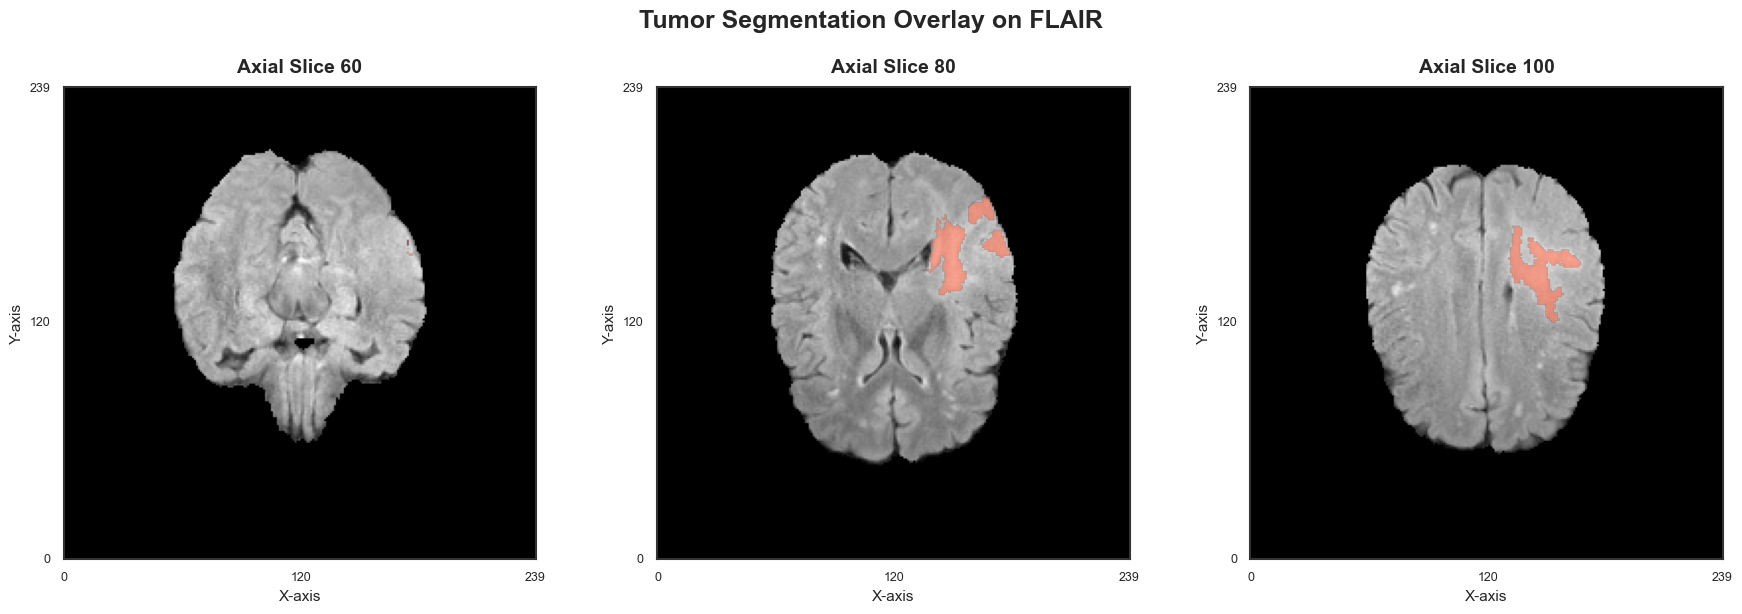


SEGMENTATION INFORMATION
Labels present in volume: [0.0, 1.0, 2.0, 4.0]

Label Definitions:
  ├─ 0: Background (healthy tissue)
  ├─ 1: Necrotic/Non-enhancing Core
  ├─ 2: Peritumoral Edema
  └─ 4: GD-Enhancing Tumor

Voxel Distribution:
  Label 0.0:  8,898,193 voxels (99.67%)
  Label 1.0:        733 voxels ( 0.01%)
  Label 2.0:     26,076 voxels ( 0.29%)
  Label 4.0:      2,998 voxels ( 0.03%)


In [43]:
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.1)

# Tumor overlay visualization with improved styling
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Tumor Segmentation Overlay on FLAIR', 
             fontsize=18, fontweight='bold', y=0.98, family='sans-serif')

if 'flair' in volumes and 'seg' in volumes:
    flair_volume = volumes['flair']
    seg_volume = volumes['seg']
    
    for idx, slice_idx in enumerate(slice_indices):
        ax = axes[idx]
        
        # Get slices
        flair_slice = flair_volume[:, :, slice_idx].T
        seg_slice = seg_volume[:, :, slice_idx].T
        
        # Display FLAIR background
        ax.imshow(flair_slice, cmap='gray', origin='lower', alpha=1.0)
        
        # Overlay segmentation in red
        seg_masked = np.ma.masked_where(seg_slice == 0, seg_slice)
        ax.imshow(seg_masked, cmap='Reds', origin='lower', alpha=0.6, vmin=0, vmax=4)
        
        # Better title styling
        ax.set_title(f'Axial Slice {slice_idx}', 
                    fontsize=14, 
                    fontweight='semibold', 
                    pad=10,
                    family='sans-serif')
        
        # Add axis labels with better styling
        ax.set_xlabel('X-axis', fontsize=11, fontweight='medium')
        ax.set_ylabel('Y-axis', fontsize=11, fontweight='medium')
        
        # Minimal ticks for cleaner look
        ax.set_xticks([0, flair_slice.shape[1]//2, flair_slice.shape[1]-1])
        ax.set_yticks([0, flair_slice.shape[0]//2, flair_slice.shape[0]-1])
        ax.tick_params(labelsize=9)
        
        # Add subtle grid
        ax.grid(False)
        
        # Add border
        for spine in ax.spines.values():
            spine.set_edgecolor('#333333')
            spine.set_linewidth(1.5)
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Segmentation info with better formatting
    print("\n" + "="*60)
    print("SEGMENTATION INFORMATION")
    print("="*60)
    unique_labels = np.unique(seg_volume)
    print(f"Labels present in volume: {unique_labels.tolist()}")
    print("\nLabel Definitions:")
    print("  ├─ 0: Background (healthy tissue)")
    print("  ├─ 1: Necrotic/Non-enhancing Core")
    print("  ├─ 2: Peritumoral Edema") 
    print("  └─ 4: GD-Enhancing Tumor")
    
    # Count voxels per label
    print("\nVoxel Distribution:")
    for label in unique_labels:
        count = np.sum(seg_volume == label)
        percentage = 100 * count / seg_volume.size
        print(f"  Label {label}: {count:>10,} voxels ({percentage:>5.2f}%)")
    print("="*60)
    
else:
    print("⚠️  Cannot create overlay - missing flair or seg volume")

# Reset to default matplotlib style for other plots if needed
sns.reset_defaults()

Tumor Segmentation Overlay on FLAIR

C:\Users\arnav\AppData\Local\Temp\ipykernel_26180\3054269244.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.94])


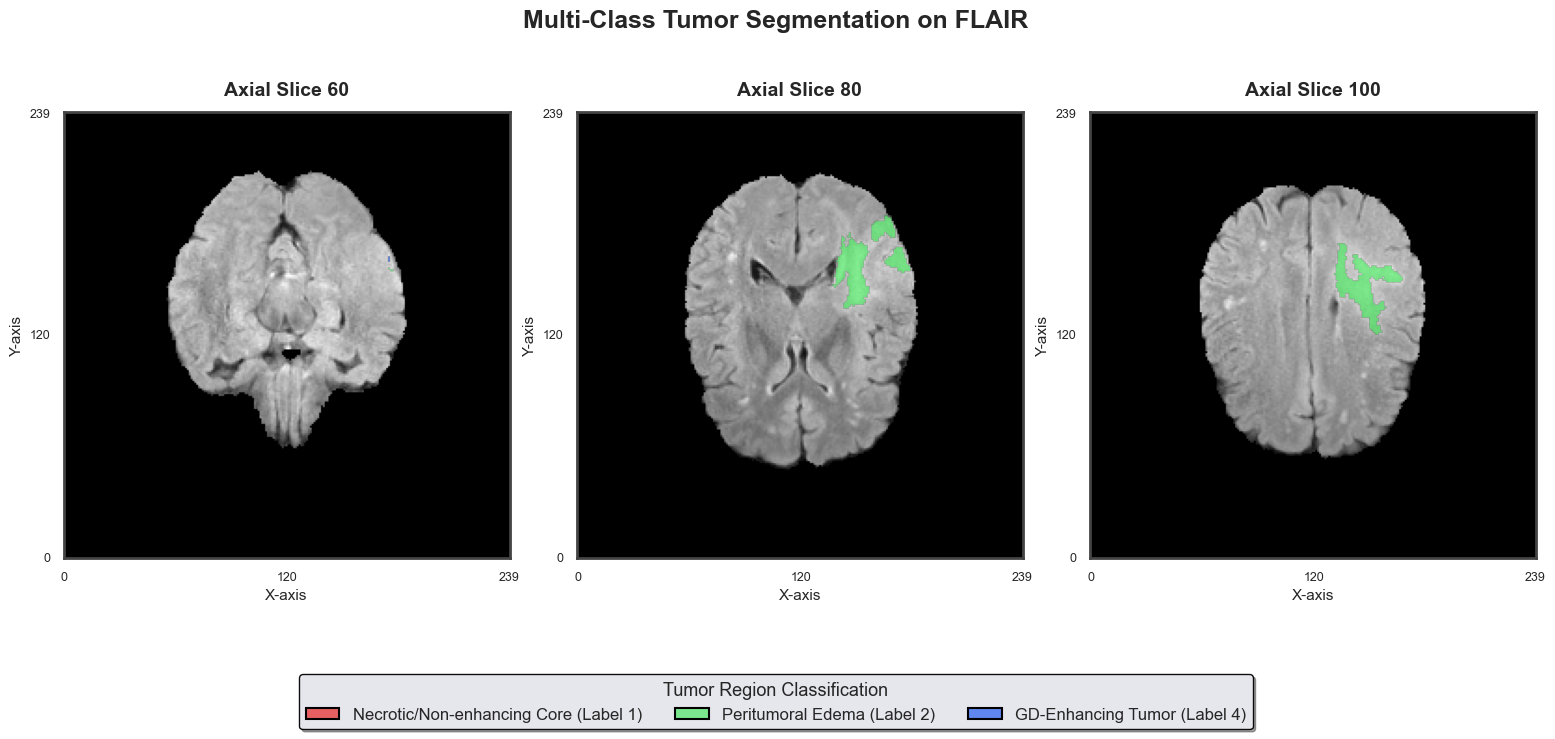

In [44]:
import seaborn as sns
from matplotlib.patches import Patch

# Set seaborn style
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.1)

# Multi-class visualization with improved styling
fig = plt.figure(figsize=(19, 7))
gs = fig.add_gridspec(1, 3, hspace=0.05, wspace=0.15)
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

fig.suptitle('Multi-Class Tumor Segmentation on FLAIR', 
             fontsize=18, fontweight='bold', y=0.96, family='sans-serif')

# Define colors for each tumor class (more vibrant)
color_map = {
    1: [0.9, 0.2, 0.2, 0.75],      # Bright Red: Necrotic Core
    2: [0.2, 0.9, 0.3, 0.60],      # Bright Green: Edema
    4: [0.2, 0.4, 0.95, 0.75]      # Bright Blue: Enhancing Tumor
}

if 'flair' in volumes and 'seg' in volumes:
    flair_volume = volumes['flair']
    seg_volume = volumes['seg']
    
    for idx, slice_idx in enumerate(slice_indices):
        ax = axes[idx]
        
        # Get slices
        flair_slice = flair_volume[:, :, slice_idx].T
        seg_slice = seg_volume[:, :, slice_idx].T
        
        # Display FLAIR background
        ax.imshow(flair_slice, cmap='gray', origin='lower')
        
        # Overlay each tumor class with different color
        for label, color in color_map.items():
            mask = (seg_slice == label)
            if np.any(mask):
                colored_mask = np.zeros((*mask.shape, 4))
                colored_mask[mask] = color
                ax.imshow(colored_mask, origin='lower')
        
        # Better title styling
        ax.set_title(f'Axial Slice {slice_idx}', 
                    fontsize=14, 
                    fontweight='semibold',
                    pad=12,
                    family='sans-serif')
        
        # Axis labels
        ax.set_xlabel('X-axis', fontsize=11, fontweight='medium')
        ax.set_ylabel('Y-axis', fontsize=11, fontweight='medium')
        
        # Minimal ticks
        ax.set_xticks([0, flair_slice.shape[1]//2, flair_slice.shape[1]-1])
        ax.set_yticks([0, flair_slice.shape[0]//2, flair_slice.shape[0]-1])
        ax.tick_params(labelsize=9)
        
        # Remove grid
        ax.grid(False)
        
        # Styled border
        for spine in ax.spines.values():
            spine.set_edgecolor('#444444')
            spine.set_linewidth(2)
    
    # Create custom legend with better styling
    legend_elements = [
        Patch(facecolor=[0.9, 0.2, 0.2, 0.75], 
              edgecolor='black', 
              linewidth=1.5,
              label='Necrotic/Non-enhancing Core (Label 1)'),
        Patch(facecolor=[0.2, 0.9, 0.3, 0.60], 
              edgecolor='black', 
              linewidth=1.5,
              label='Peritumoral Edema (Label 2)'),
        Patch(facecolor=[0.2, 0.4, 0.95, 0.75], 
              edgecolor='black', 
              linewidth=1.5,
              label='GD-Enhancing Tumor (Label 4)')
    ]
    
    # Place legend below plots
    fig.legend(handles=legend_elements, 
              loc='lower center', 
              ncol=3, 
              bbox_to_anchor=(0.5, -0.08),
              fontsize=12,
              frameon=True,
              fancybox=True,
              shadow=True,
              framealpha=0.95,
              edgecolor='black',
              title='Tumor Region Classification',
              title_fontsize=13)
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0.05, 1, 0.94])
    plt.show()
    
else:
    print("⚠️  Cannot create multi-class overlay - missing volumes")

# Reset style
sns.reset_defaults()

In [45]:
print("\n" + "="*60)
print("WEEK-1 SUMMARY")
print("="*60)
if len(volumes) == 5:
    print(f"✓ Successfully loaded all 5 volumes for {patient_id}")
    print(f"✓ Volume shape: {volumes['flair'].shape}")
    print(f"✓ Visualized slices at indices: {slice_indices}")
    
    if 'seg' in volumes:
        seg = volumes['seg']
        print(f"\nTumor Statistics:")
        print(f"  Total voxels: {seg.size:,}")
        print(f"  Tumor voxels: {np.count_nonzero(seg):,}")
        print(f"  Tumor %: {100*np.count_nonzero(seg)/seg.size:.2f}%")
    
    print("\n✅ Week-1 Complete! Ready for Week-2 preprocessing.")
else:
    print(f"⚠️  Only loaded {len(volumes)}/5 volumes")
    
print("="*60)


WEEK-1 SUMMARY
✓ Successfully loaded all 5 volumes for BraTS20_Training_003
✓ Volume shape: (240, 240, 155)
✓ Visualized slices at indices: [60, 80, 100]

Tumor Statistics:
  Total voxels: 8,928,000
  Tumor voxels: 29,807
  Tumor %: 0.33%

✅ Week-1 Complete! Ready for Week-2 preprocessing.
